Credit Risk Prediction ML Project!
Serves as a way to see whether or not a person's loan application will default based on credit. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accepted_loans = "data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018q4.csv"

try: 
    df_accepted = pd.read_csv(accepted_loans, low_memory=False) # low_memory=False to avoid dtype warning for large files
    print("Data Loaded Successfully")
except FileNotFoundError:
    print(f"File {accepted_loans} not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")


Data Loaded Successfully


In [4]:
print("\n--First 5 Rows of the Data--")
print(df_accepted.head())


--First 5 Rows of the Data--
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_las

In [5]:
print("\nDataFrame Info:")
print(df_accepted.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [7]:
print("DataFrame shape:")
print("Rows:", df_accepted.shape[0], "Columns:", df_accepted.shape[1])

DataFrame shape:
Rows: 2260701 Columns: 151


In [8]:
print("Descriptive statistics:")
print(df_accepted.describe())

Descriptive statistics:
       member_id     loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count        0.0  2.260668e+06  2.260668e+06     2.260668e+06  2.260668e+06   
mean         NaN  1.504693e+04  1.504166e+04     1.502344e+04  1.309283e+01   
std          NaN  9.190245e+03  9.188413e+03     9.192332e+03  4.832138e+00   
min          NaN  5.000000e+02  5.000000e+02     0.000000e+00  5.310000e+00   
25%          NaN  8.000000e+03  8.000000e+03     8.000000e+03  9.490000e+00   
50%          NaN  1.290000e+04  1.287500e+04     1.280000e+04  1.262000e+01   
75%          NaN  2.000000e+04  2.000000e+04     2.000000e+04  1.599000e+01   
max          NaN  4.000000e+04  4.000000e+04     4.000000e+04  3.099000e+01   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.260668e+06  2.260664e+06  2.258957e+06  2.260639e+06    2.260668e+06   
mean   4.458068e+02  7.799243e+04  1.882420e+01  3.068792e-01    6.985882e+02   
std    2.671735e+02  

In [ ]:
# The list of columns in the DataFrame (features)
print("\nList of Features (Potential):")
print(df_accepted.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [18]:
print("All Unique Loan Statuses in Raw Data:\n", df_accepted['loan_status'].value_counts()) 

All Unique Loan Statuses in Raw Data:
 loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


Shape of filtered DataFrame: (1369566, 151)

Number of Defaulted Loans:
is_default
0    1078739
1     290827
Name: count, dtype: int64

Proportion of Defaulted Loans:
is_default
0    0.78765
1    0.21235
Name: proportion, dtype: float64

Default Rate: 21.23%


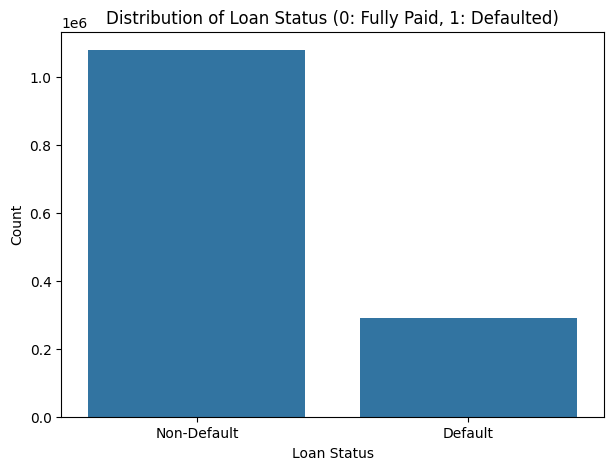

In [ ]:
# Current, Late (16-30 days), In Grace Period, and Current are not included as they are not final statuses.
target_mapping = {
    "Charged Off": 1,
    "Default": 1,
    "Late (31-120 days)": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0
} 

#Filtering the DataFrame to include only the final statuses
final_status = ["Charged Off", "Default", "Late (31-120 days)", "Does not meet the credit policy. Status:Charged Off", "Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]

df_filtered = df_accepted[df_accepted['loan_status'].isin(final_status)].copy() #.copy() to avoid SettingWithCopyWarning
print(f"Shape of filtered DataFrame: {df_filtered.shape}") # 1369566 < 2260701 original rows

# Mapping the loan status to binary target variable
df_filtered['is_default'] = df_filtered['loan_status'].map(target_mapping)

# Checking the distribution of the target variable
y = df_filtered['is_default']
print("\nNumber of Defaulted Loans:")
print(y.value_counts())
print("\nProportion of Defaulted Loans:")
print(y.value_counts(normalize=True))

default_rate = y.mean() * 100 # Default rate in percentage
print(f"\nDefault Rate: {default_rate:.2f}%")

# Visualizing the distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x=y) # x = y means that we are plotting the target variable, which includes 0 and 1 (non-default and default)
plt.title('Distribution of Loan Status (0: Fully Paid, 1: Defaulted)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.show()

In [32]:
# Dropping columns that are not useful for the analysis
columns_to_drop = [
    # 1. Identifiers and Unnecessary Columns
    'id',
    'member_id',
    'url',
    'desc',
    'loan_status',
    'title',
    'zip_code',
    'emp_title',

    # 2. Data Leakage: Information that would not be available at the time of loan application, only available after the loan is issued or defaulted
    'funded_amnt',
    'funded_amnt_inv',
    'pymnt_plan',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'last_fico_range_high',
    'last_fico_range_low',

    # 3. Hardship and Debt Settlement Information (outcomes of distress not related to the original loan application)
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'deferral_term',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag',
    'debt_settlement_flag_date',
    'settlement_status',
    'settlement_date',
    'settlement_amount',
    'settlement_percentage',
    'settlement_term',

    # 4. Joint/Secondary Borrower Information (not relevant for single borrower analysis)
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'revol_bal_joint',
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'sec_app_mths_since_last_major_derog',

    # 5. Columns with High Missing Values or Irrelevant Information
    'mths_since_last_delinq',
    'policy_code'
]

In [ ]:
existing_columns = [col for col in columns_to_drop if col in df_filtered.columns]

# Create the features DataFrame
X = df_filtered.drop(columns=existing_columns + ['is_default'], errors='ignore')  # errors='ignore' to avoid KeyError if any column is not present

print(f"\nInitial number of features: {X.shape[1]}") # 85 < 151 original features
print("First 5 Rows of Features DataFrame:")
print(X.head())


Initial number of features: 85
First 5 Rows of Features DataFrame:
   loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0     3600.0   36 months     13.99       123.03     C        C4  10+ years   
1    24700.0   36 months     11.99       820.28     C        C1  10+ years   
2    20000.0   60 months     10.78       432.66     B        B4  10+ years   
4    10400.0   60 months     22.45       289.91     F        F1    3 years   
5    11950.0   36 months     13.44       405.18     C        C3    4 years   

  home_ownership  annual_inc verification_status  ... num_tl_op_past_12m  \
0       MORTGAGE     55000.0        Not Verified  ...                3.0   
1       MORTGAGE     65000.0        Not Verified  ...                2.0   
2       MORTGAGE     63000.0        Not Verified  ...                0.0   
4       MORTGAGE    104433.0     Source Verified  ...                4.0   
5           RENT     34000.0     Source Verified  ...                0.0   

  pct_

In [36]:
missing_values = X.isnull().sum()
missing_value_count = missing_values[missing_values > 0]
print(f"\nNumber of Features with Missing Values:\n", missing_value_count.sort_values(ascending=False))


Number of Features with Missing Values:
 mths_since_last_record            1136114
mths_since_recent_bc_dlq          1045111
mths_since_last_major_derog       1009260
mths_since_recent_revol_delinq     911978
il_util                            887579
                                   ...   
open_acc                               29
earliest_cr_line                       29
pub_rec                                29
delinq_amnt                            29
annual_inc                              4
Length: 68, dtype: int64


In [43]:
missing_percentage = (X.isnull().sum() / len(X)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"\nPercentage of Missing Values in Each Feature:\n", missing_percentage.sort_values(ascending=False).head(30))


Percentage of Missing Values in Each Feature:
 mths_since_last_record            82.954308
mths_since_recent_bc_dlq          76.309648
mths_since_last_major_derog       73.691958
mths_since_recent_revol_delinq    66.588832
il_util                           64.807319
mths_since_rcnt_il                60.384969
all_util                          59.296376
total_cu_tl                       59.292360
open_acc_6m                       59.292360
inq_last_12m                      59.292360
total_bal_il                      59.292287
open_rv_12m                       59.292287
max_bal_bc                        59.292287
inq_fi                            59.292287
open_rv_24m                       59.292287
open_act_il                       59.292287
open_il_12m                       59.292287
open_il_24m                       59.292287
mths_since_recent_inq             13.038729
num_tl_120dpd_2m                   8.872154
mo_sin_old_il_acct                 7.966684
emp_length                  

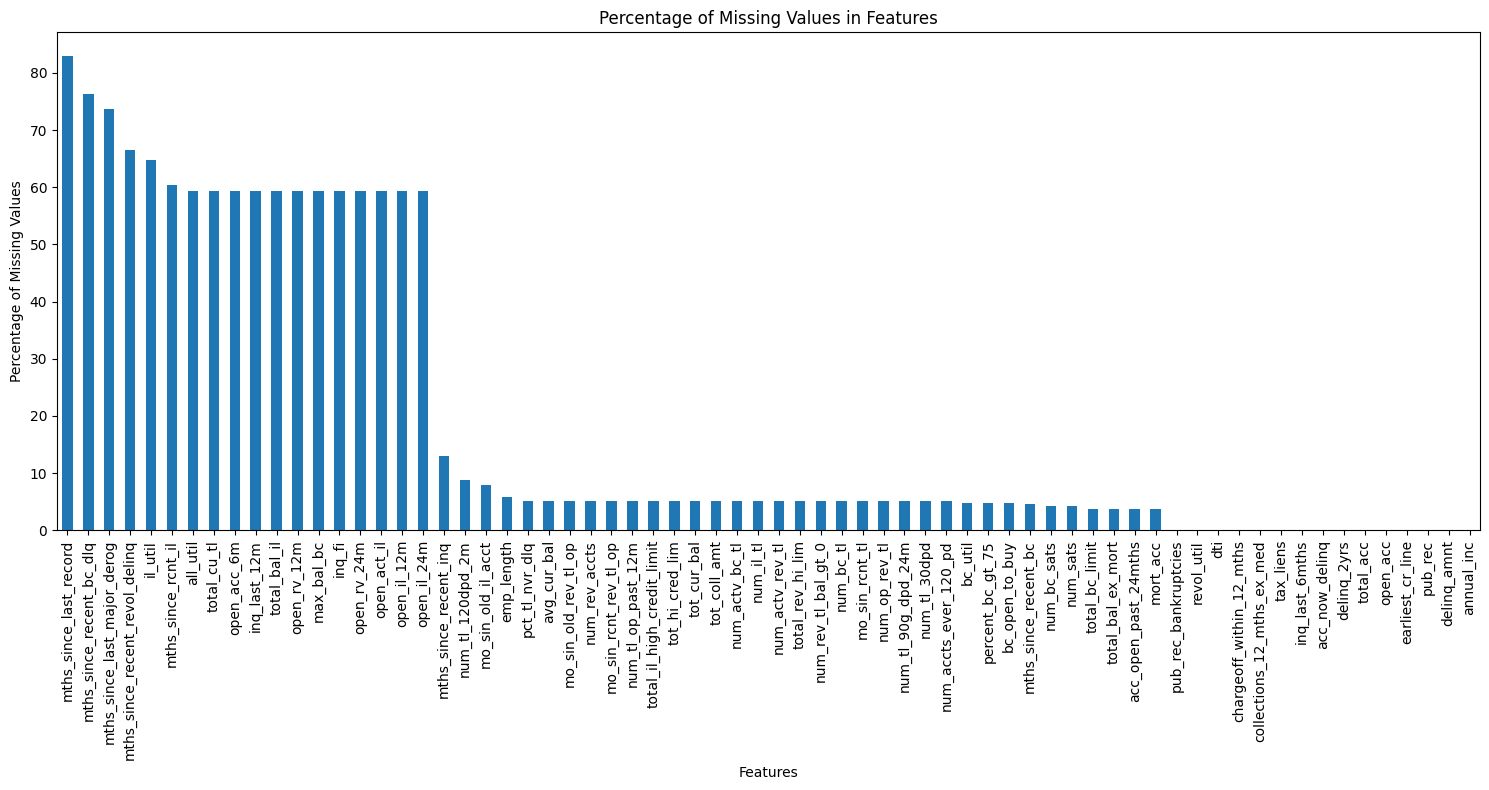

In [44]:
if not missing_percentage.empty:
    plt.figure(figsize=(15, 8))
    missing_percentage.sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values in Features')
    plt.xlabel('Features')
    plt.ylabel('Percentage of Missing Values')
    plt.tight_layout()
    plt.show()

else: 
    print("No features with missing values found.")

mths_since_last_record            82.954308
mths_since_recent_bc_dlq          76.309648
mths_since_last_major_derog       73.691958
mths_since_recent_revol_delinq    66.588832
il_util                           64.807319
mths_since_rcnt_il                60.384969
all_util                          59.296376
total_cu_tl                       59.292360
open_acc_6m                       59.292360
inq_last_12m                      59.292360
total_bal_il                      59.292287
open_rv_12m                       59.292287
max_bal_bc                        59.292287
inq_fi                            59.292287
open_rv_24m                       59.292287
open_act_il                       59.292287
open_il_12m                       59.292287
open_il_24m                       59.292287 

These all have rather high rates of missing values, and then a sharp drop to only 8% and lower for future features. Need further data cleaning for this to progress.